# AIRBNB DATA VISUALISATION

#### What is Airbnb?

##### Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app.
##### Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. 

## --------------------------------------------------------------------------------------

### About Data

##### The data had two tables after cleaning and merging the data we have  11922 rows and 28  columns  and the data have 11 categorical features and 17 numerical features

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
airbnb=pd.read_csv('airbnb_cleaned.csv')

In [6]:
airbnb.head(4)

listing_id                                            name  host_id  \
0           6  Large Craftsmen w/ yard ~ Perfect for families       29   
1        5570                   Ocean front condo on the sand     8435   
2        8095                            Sunset Cliffs Studio      270   
3       39516                 Art Studio Retreat/Rustic Cabin   169649   

                           host_name host_is_superhost neighbourhood_cleansed  \
0                               Sara                 t            North Hills   
1  Jef Karchin'S MISSIONBEACHRETREAT                 f            Mission Bay   
2                              Marin                 f            Ocean Beach   
3                    Chris  And Jean                 t            North Hills   

        city state        country   latitude  ...  \
0  San Diego    CA  United States  32.753993  ...   
1  San Diego    CA  United States  32.784304  ...   
2  San Diego    CA  United States  32.735170  ...   
3  San Diego    CA  United States  32.731884  ...   

                                           amenities price weekly_price  \
0  tv,internet,wifi,air conditioning,kitchen,free...   295            0   
1  tv,cable tv,internet,wifi,kitchen,free parking...  2050            0   
2  internet,wifi,kitchen,free parking on premises...    84            0   
3  internet,wifi,pool,kitchen,pets live on this p...    69          450   

   monthly_price  maximum_nights  minimum_nights  cleaning_fee  \
0              0              30               2            85   
1              0             365               3           150   
2              0              14               2            40   
3              0               7               3            25   

  number_of_reviews  reviews_per_month  \
0               149               1.18   
1                 0               0.00   
2               178               1.56   
3               338               3.33   

                                            comments  
0  sara is an awesome hostess  she was very consi...  
1                                                NaN  
2  rocio and marin were great hosts \r\nthe guest...  
3  i dont know where to begin on how seriously hu...  

[4 rows x 27 columns]

In [7]:
airbnb.shape

(11922, 27)

In [8]:
airbnb.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'host_is_superhost',
       'neighbourhood_cleansed', 'city', 'state', 'country', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'weekly_price',
       'monthly_price', 'maximum_nights', 'minimum_nights', 'cleaning_fee',
       'number_of_reviews', 'reviews_per_month', 'comments'],
      dtype='object')

## 1.Who are the Top earners host in terms of total earning=(price x minimum_nights) x number_of_reviews

In [9]:
top_earners=airbnb[['host_name','price','minimum_nights','number_of_reviews','room_type']]

In [10]:
top_earners['total_earning']=top_earners['price']*top_earners['minimum_nights']*top_earners.number_of_reviews

In [11]:
top_earners.sort_values(by='number_of_reviews',ascending=False).head(10)

host_name  price  minimum_nights  number_of_reviews  \
51              Tanja     59               1                686   
579   Kyle And Paige!     99               1                552   
871             Tanja     55               1                535   
150           Michael     69               1                534   
7                Lisa     75               1                498   
116           Michael     49               1                491   
147             Tanja     48               1                477   
161           Michael     49               1                475   
327        Jacquelyne    119               1                471   
1996             Rose     50               1                468   

            room_type  total_earning  
51       Private room          40474  
579   Entire home/apt          54648  
871      Private room          29425  
150      Private room          36846  
7     Entire home/apt          37350  
116      Private room          24059  
147   Entire home/apt          22896  
161      Private room          23275  
327   Entire home/apt          56049  
1996     Private room          23400

In [12]:
fig_top_earners=top_earners.sort_values(by='total_earning',ascending=False)[0:10]
fig_top_earners

host_name  price  minimum_nights  number_of_reviews        room_type  \
6899      A.C.    488             250                 22  Entire home/apt   
9924   Phillip    200             360                 17  Entire home/apt   
3129     Kelly    197              60                 56  Entire home/apt   
7676    Billie    200             180                 18  Entire home/apt   
4429       Ari    149              30                119  Entire home/apt   
2171       Art    109              28                165  Entire home/apt   
5401     Chris     90             365                 15  Entire home/apt   
334      Susan     75              30                215     Private room   
315      David    450              30                 35  Entire home/apt   
1965       Tao     67              31                222  Entire home/apt   

      total_earning  
6899        2684000  
9924        1224000  
3129         661920  
7676         648000  
4429         531930  
2171         503580  
5401         492750  
334          483750  
315          472500  
1965         461094

In [13]:
fig=px.bar(fig_top_earners,
          x='total_earning',
          y='host_name',
          orientation='h',
          title='Top 10 Earners in Airbnb from United States',
          labels = {'host_name':'Hosts', 'price':'Total Earnings'})
fig.update_layout(yaxis={'categoryorder':'max ascending'})
fig.show()

### Conclusion:-
   #### As we can se the top 10 earner based on number of reviews are A.C followed by phillip and  kelly also this host rent there entire apt

## 2.Is there any relationship between monthly earning and prices

In [14]:
airbnb.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'host_is_superhost',
       'neighbourhood_cleansed', 'city', 'state', 'country', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'weekly_price',
       'monthly_price', 'maximum_nights', 'minimum_nights', 'cleaning_fee',
       'number_of_reviews', 'reviews_per_month', 'comments'],
      dtype='object')

In [15]:
q2=airbnb

In [16]:
q2=q2[q2['monthly_price']>0]

In [17]:
fig = plt.figure(figsize = (10, 5))
px.scatter(q2,x=q2.monthly_price,y=q2.price,
          labels = {'price':'price',"monthly_price":'monthly_earing'},
          title='Relationship between monthly earning and prices'
          )


<Figure size 720x360 with 0 Axes>

### Conclusion:-

#### We can say that more people tend to prefer a budget stay and also we can observe that in higer price lesser the room earns

## 3. Do Superhost charge more rent?

In [18]:
host=airbnb.groupby(['host_is_superhost'],as_index=False)['price'].mean().round(decimals=0)
host

host_is_superhost  price
0                 f  223.0
1                 t  191.0

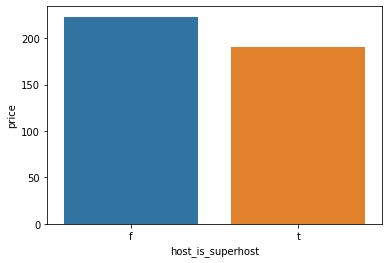

In [19]:
host=airbnb.groupby(['host_is_superhost'],as_index=False)['price'].mean().round(decimals=0)
host
sns.barplot(data=host,x='host_is_superhost' ,y='price')  
plt.show()

### Conclusion:-

#### It seems being a superhost doesn't have much relation with more rent as we can observe that the average price for being a superhost and not being a superhost is same

## 4. Which room type are most pref by people?


In [20]:
airbnb.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'host_is_superhost',
       'neighbourhood_cleansed', 'city', 'state', 'country', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'weekly_price',
       'monthly_price', 'maximum_nights', 'minimum_nights', 'cleaning_fee',
       'number_of_reviews', 'reviews_per_month', 'comments'],
      dtype='object')

In [21]:
airbnb.room_type.value_counts()

Entire home/apt    8304
Private room       3426
Shared room         192
Name: room_type, dtype: int64

In [22]:
room=airbnb.groupby(['room_type'],as_index=False)['number_of_reviews'].sum()
room

room_type  number_of_reviews
0  Entire home/apt             247134
1     Private room              94422
2      Shared room               2995

In [23]:
#plt.figure(figsize = (10, 5))
px.pie(room,names=room.room_type,values=room.number_of_reviews,
      title='Most booked room types w.r.t sum of reviews')

### Conclusion:-

#### As we can observe the pie chart that people prefer more to book an entire home/apt than a shared or a private room.

# 5.Which City is prefered most on the basis of number of reviews?


In [24]:
airbnb.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'host_is_superhost',
       'neighbourhood_cleansed', 'city', 'state', 'country', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'weekly_price',
       'monthly_price', 'maximum_nights', 'minimum_nights', 'cleaning_fee',
       'number_of_reviews', 'reviews_per_month', 'comments'],
      dtype='object')

In [25]:
airbnb.city.value_counts()

San Diego             11204
La Jolla                299
Chula Vista             280
Del Mar                  82
Tijuana                   8
La Mesa                   7
Solana Beach              6
Mission Beach             5
Bonita                    4
CA                        3
National City             3
Lemon Grove               3
Pacific Beach             3
Alpine                    2
Escondido                 2
Coronado                  2
Ocean Beach               2
Mission Bay               1
Newport Beach             1
Santee                    1
University Heights        1
Spring Valley             1
Oceanside                 1
Imperial Beach            1
Name: city, dtype: int64

In [26]:
location_data=airbnb.groupby('city',as_index=False)['number_of_reviews'].sum()[0:10]
location_data.sort_values(by='number_of_reviews',ascending=False,inplace=True)

In [27]:
location_data

city  number_of_reviews
3     Chula Vista               5698
8        La Jolla               5239
5         Del Mar               1414
9         La Mesa                219
6       Escondido                 97
0          Alpine                 18
1          Bonita                 17
2              CA                  2
4        Coronado                  0
7  Imperial Beach                  0

In [28]:
#fig=plt.figure(figsize=(20,10))
fig=px.pie(location_data,names=location_data.city,values=location_data.number_of_reviews)
fig.show()

## Conclusion:-

#### We can observe CHULA VISTA and LA JOLLA  followed by DEL MAR recived maximum reviews.
#### CHULA VISTA and LA JOLLA being one of the top beach destination in world more people prefer to rent the rooms beach side

# 6.Price relation with respect to location

In [29]:
pricevslocation=airbnb[['neighbourhood_cleansed','price']].sort_values(by='price',ascending=False)

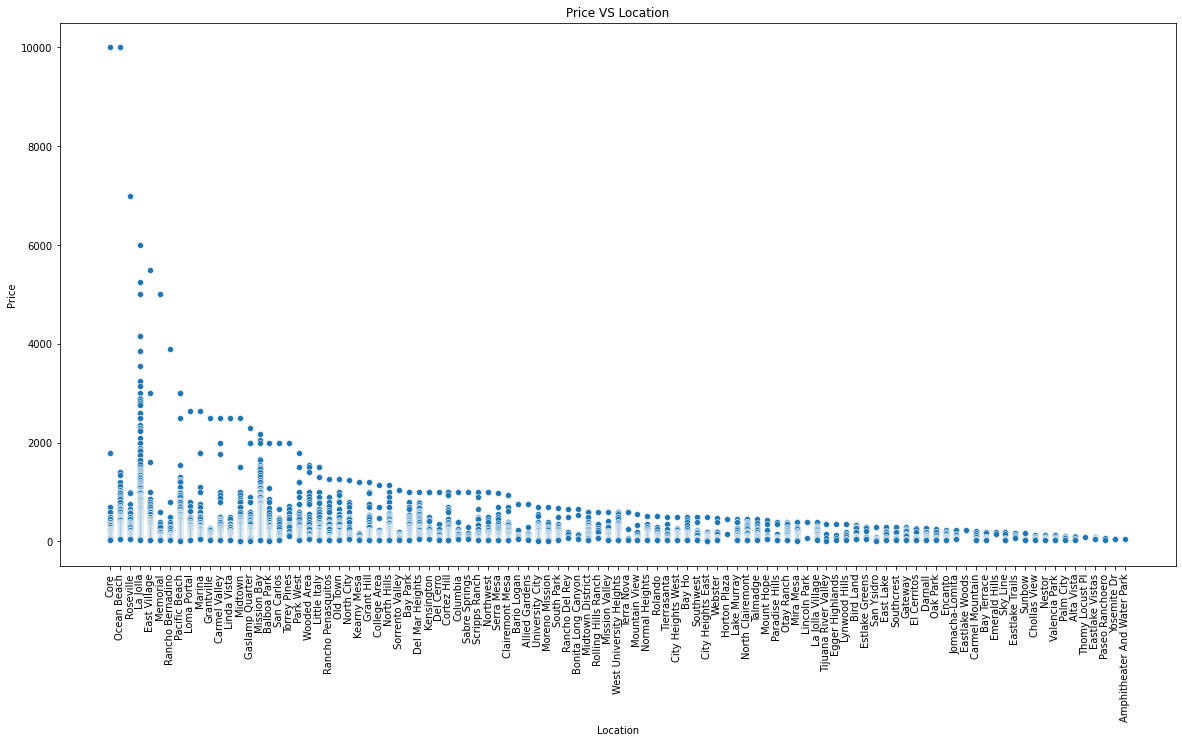

In [30]:
fig=plt.figure(figsize=(20,10))
sns.scatterplot(x=pricevslocation.neighbourhood_cleansed, y=pricevslocation.price)
plt.xticks(rotation = 'vertical')
plt.title('Price VS Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

### Conclusion:-

#### We can observe that the plces like Lajolla,Core,Ocean beach,roseville have the most expensive rooms also it seems the places are best location stay because of the higher price

# 7.Do price have any relation with reviews?

In [31]:
airbnb.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'host_is_superhost',
       'neighbourhood_cleansed', 'city', 'state', 'country', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'weekly_price',
       'monthly_price', 'maximum_nights', 'minimum_nights', 'cleaning_fee',
       'number_of_reviews', 'reviews_per_month', 'comments'],
      dtype='object')

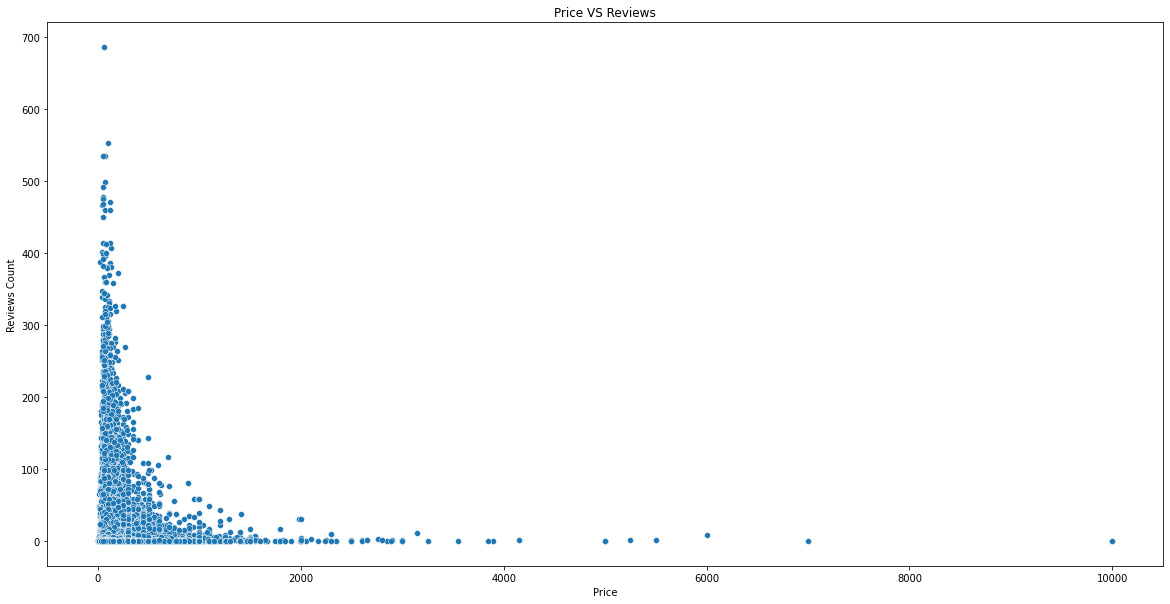

In [32]:
fig=plt.figure(figsize=(20,10))
sns.scatterplot(y=airbnb.number_of_reviews,x=airbnb.price,markers=10)
plt.title('Price VS Reviews')
plt.ylabel('Reviews Count')
plt.xlabel('Price')
plt.show()

### Conclusion:-

#### The scatter plot tells that the people prefer to stay  in a budget friendly rooms as we can see higher the price less the reviews are.

# 8.Ammenities vs Price

In [33]:
# ammenities vs price
airbnb.amenities.fillna("no ammenities",inplace=True)

In [34]:
airbnb['total_amenities']=[i.count(',') for i in airbnb.amenities ]

In [35]:
airbnb.amenities[3]

'internet,wifi,pool,kitchen,pets live on this property,dog(s),cat(s),free street parking,heating,family/kid friendly,smoke detector,carbon monoxide detector,first aid kit,safety card,fire extinguisher,essentials,shampoo,hangers,hair dryer,iron,translation missing: en.hosting_amenity_50,hot water,microwave,coffee maker,refrigerator,dishes and silverware,cooking basics,ev charger,bbq grill,garden or backyard,luggage dropoff allowed,other'

In [36]:
dff=airbnb.copy()

In [37]:
# removing the nan values as it conflicts the data parsing
def comma(ammi):
    string=ammi.replace('nan','')
    return string

In [38]:
dff.amenities.fillna("no ammenities",inplace=True)

In [39]:
dff['total_amenities'] # looks good

0        34
1        28
2         5
3        31
4         5
         ..
11917    20
11918    19
11919    25
11920    26
11921    13
Name: total_amenities, Length: 11922, dtype: int64

In [40]:
amvsprice=airbnb[['total_amenities','price']].sort_values(by='price',ascending=False)

In [41]:
amvsprice

total_amenities  price
10915               10  10000
10911                8  10000
9366                19   7000
9041                29   6000
5864                 3   5500
...                ...    ...
6685                34     10
7329                 5     10
11372               10     10
7046                48      0
5919                 5      0

[11922 rows x 2 columns]

Text(0.5, 0, 'Price')

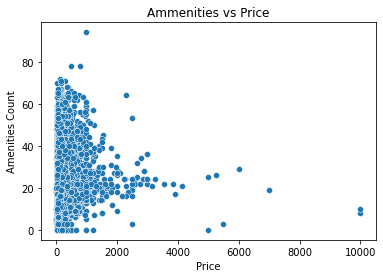

In [42]:
sns.scatterplot(y=airbnb.total_amenities,x=airbnb['price'])
plt.title('Ammenities vs Price')
plt.ylabel('Amenities Count')
plt.xlabel('Price')
#fig=px.scatter(amvsprice,y=amvsprice.total_amenities,x=amvsprice.price)
#fig.show()

### Conclusion:-

#### We can observe that the cheapest rooms are providing the most amenities to its customer.

# 9. Top 10 budget friendly locations?

In [43]:
airbnb.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'host_is_superhost',
       'neighbourhood_cleansed', 'city', 'state', 'country', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'weekly_price',
       'monthly_price', 'maximum_nights', 'minimum_nights', 'cleaning_fee',
       'number_of_reviews', 'reviews_per_month', 'comments',
       'total_amenities'],
      dtype='object')

In [44]:
asd=airbnb[['room_type','total_amenities','price']]

In [45]:
asd=airbnb.groupby('city')['price'].mean().reset_index()

In [46]:
asd

city        price
0               Alpine  1131.000000
1               Bonita   256.500000
2                   CA   124.333333
3          Chula Vista   120.892857
4             Coronado   201.500000
5              Del Mar   329.646341
6            Escondido    41.000000
7       Imperial Beach   350.000000
8             La Jolla   518.501672
9              La Mesa   147.000000
10         Lemon Grove   101.333333
11         Mission Bay   350.000000
12       Mission Beach   455.000000
13       National City   199.333333
14       Newport Beach   221.000000
15         Ocean Beach   288.500000
16           Oceanside   360.000000
17       Pacific Beach   276.000000
18           San Diego   205.919582
19              Santee   160.000000
20        Solana Beach   157.333333
21       Spring Valley    42.000000
22             Tijuana    50.375000
23  University Heights   280.000000

In [47]:
asd.sort_values(by='price',ascending=True,inplace=True)

Text(0.5, 1.0, 'Top 10 cities vs price')

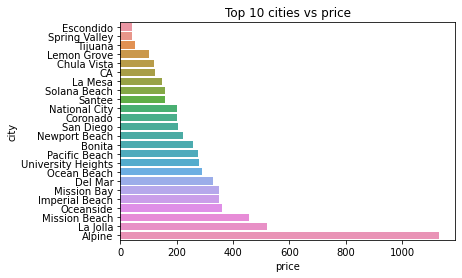

In [48]:
sns.barplot(y=asd.city,x=asd.price,orient="h")
plt.title('Top 10 cities vs price')
#plt.ylabel('city')
#plt.xlabel('Price')

### Conclusion:-

#### We can observe in this bar chart that Escondido , chula vista followed by La messa are the cities with less expensive rooms on the  other side Alpine ,la jolla & imperial beach are the expensive once.

# 10.Common amenities offered by rooms

In [49]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: six in c:\users\user\anaconda3\lib\site-packages (from cycler>=0.10->matplotlib->wordcloud) (1.12.0)



In [50]:
from wordcloud import WordCloud,STOPWORDS

In [51]:
stopwords=set(STOPWORDS)

In [52]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [53]:
word_amenities=" ".join(airbnb['amenities'])

In [54]:
word_amenities

'tv,internet,wifi,air conditioning,kitchen,free parking on premises,pets allowed,free street parking,heating,family/kid friendly,washer,dryer,smoke detector,carbon monoxide detector,first aid kit,fire extinguisher,essentials,shampoo,24-hour check-in,hangers,hair dryer,iron,laptop friendly workspace,baby monitor,outlet covers,bathtub,changing table,high chair,children’s books and toys,babysitter recommendations,crib,children’s dinnerware,hot water,luggage dropoff allowed,other tv,cable tv,internet,wifi,kitchen,free parking on premises,elevator,heating,family/kid friendly,washer,dryer,smoke detector,essentials,hair dryer,iron,laptop friendly workspace,microwave,coffee maker,refrigerator,dishwasher,dishes and silverware,cooking basics,oven,stove,bbq grill,patio or balcony,long term stays allowed,waterfront,beachfront internet,wifi,kitchen,free parking on premises,heating,essentials internet,wifi,pool,kitchen,pets live on this property,dog(s),cat(s),free street parking,heating,family/kid f

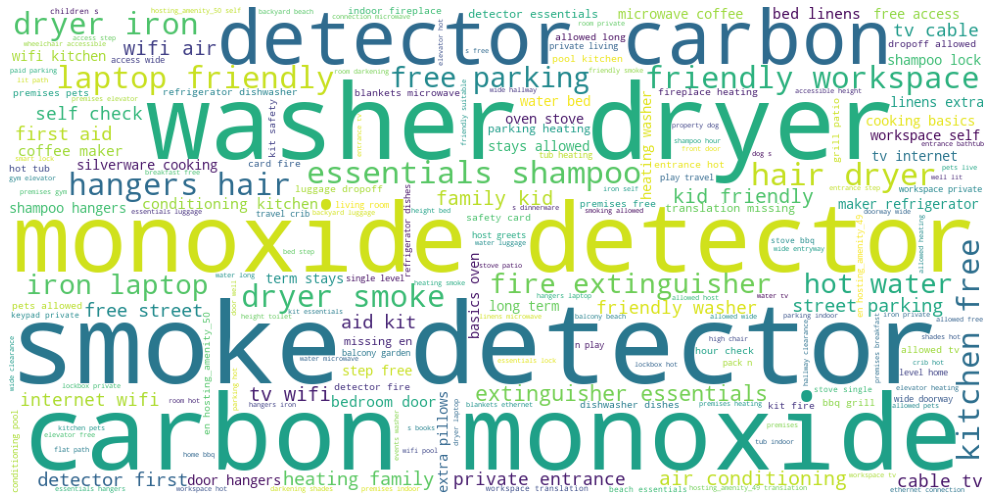

In [55]:
wordcloud = WordCloud(width = 1000, height = 500, stopwords = stopwords, background_color = 'white').generate(word_amenities)
plt.figure(figsize = (25, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Conclusion:-

#### The most amenities given by the rooms are washer dryer, hair dryer, smoke detector, shampoo, wifi also some amenities provide the free parking

# 11.  Analyzing the comments on word cloud

In [56]:
word_comments=" ".join(airbnb['comments']) #looks like there are nan values

TypeError: sequence item 1: expected str instance, float found

In [ ]:
airbnb.comments.fillna('no comments',inplace=True)# lets remove  it

In [ ]:
word_comments=" ".join(airbnb['comments'])

In [ ]:
word_comments

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500, stopwords = stopwords, background_color = 'white').generate(word_comments)
plt.figure(figsize = (25, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Conclusion

#### We can observe the common keyword used by people on there reviews are - clean, great stay, comfortable, amazing, great location etc.. 

# 12. Property vs Price?

In [ ]:
airbnb.columns

Text(0.5, 1.0, 'Expensive Property Type')

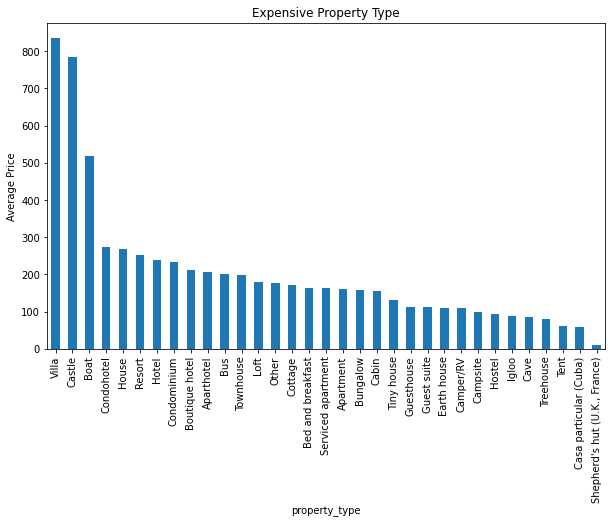

In [3]:
plt.figure(figsize=(10,6))
airbnb.groupby('property_type')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Average Price')
plt.title("Expensive Property Type")

### Conclusion:-

#### We can see that the expensive properties are Vlla, Cstle,Bat and the budget friendly properties are Srviced Aartment, Aprtments, Bngalow, Gest House etc..

# 13.Property vs Reviews

Text(0.5, 1.0, 'Property VS Reviews')

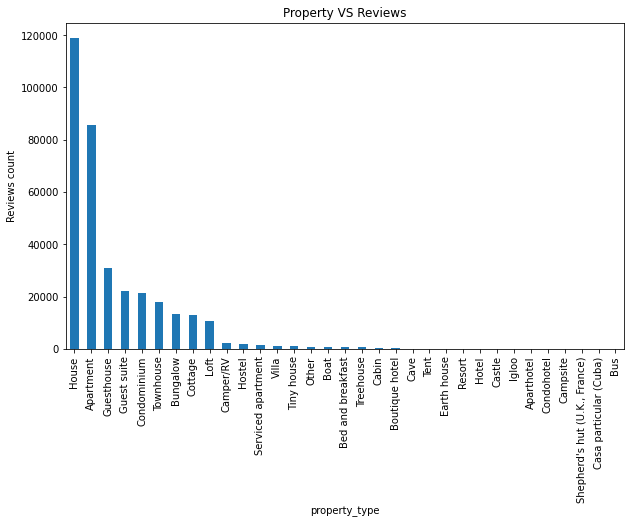

In [59]:
plt.figure(figsize=(10,6))
airbnb.groupby('property_type')['number_of_reviews'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Reviews count')
plt.title("Property VS Reviews")

### Conclusion:-

#### If we compare the previous (Q11) visual with this we can observe that people always prefer to stay in budget friendly rooms like house,apartment, guest house etc..

# 14. Number of Amenities Provided w.r.t. Room Type

In [ ]:
airbnb.columns

In [58]:
px.box(data_frame = airbnb, 
       x = 'room_type', 
       y = 'total_amenities', 
       color = 'room_type', 
      title = 'Number of Amenities Provided w.r.t. Room Type', 
      labels = {'room_type' : 'Room Type'})

### Conclusion:-

####  We can observe that the Entire apt and Private room provide 22 amenities on an average 

# 15.Location vs reviews

In [ ]:
airbnb.columns

<AxesSubplot:xlabel='neighbourhood_cleansed'>

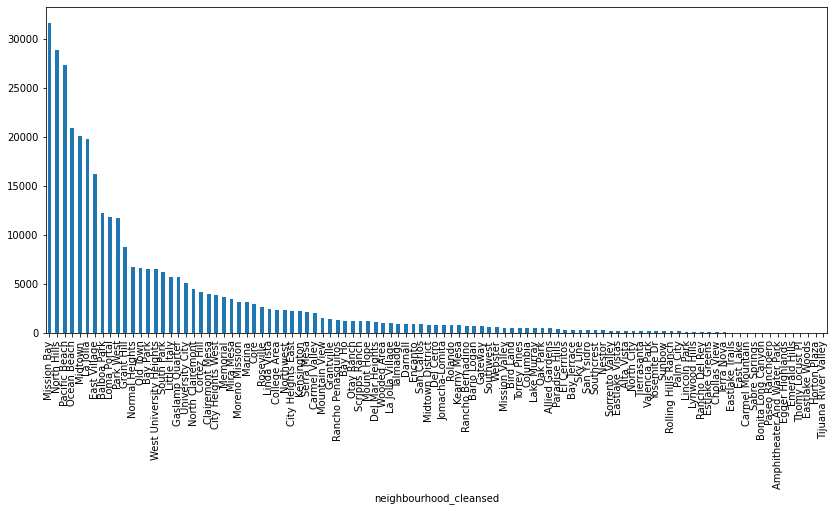

In [57]:
#Lets check were people to stay on the basis of reviews
plt.figure(figsize=(14,6))
airbnb.groupby('neighbourhood_cleansed')['number_of_reviews'].sum().sort_values(ascending=False).plot(kind='bar')

### Conclusion:-

####  We can observe that the most people prefer to stay at the beach side location  